3. Utiliza el siguiente enlace para descargar el conjunto de datos del Portal de
Datos Abiertos del Ayuntamiento de Madrid sobre accidentes de bicicletas
correspondiente al año 2019. Utiliza un Jupyter Notebook y el paquete Pandas
para abrir el archivo y presentarlo en formato DataFrame, donde el nombre de
las columnas debe corresponder con el nombre real de las variables

In [1]:
import pandas as pd
import numpy as np

# Para la visualización de datos
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Estilo para las gráficas
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
df=pd.read_csv('AccidentesBicicletas_2023.csv', sep=(';'))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AccidentesBicicletas_2023.csv'

In [ ]:
df.describe()

,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga
count,626.000000,525.000000,626.000000,6.260000e+02,4.0
mean,8.899361,5.737143,441776.590409,4.474852e+06,1.0
std,5.801332,3.983680,3465.463686,3.644854e+03,0.0
min,1.000000,1.000000,433418.090000,4.465121e+06,1.0
25%,4.000000,2.000000,439543.636250,4.472661e+06,1.0
50%,9.000000,6.000000,441336.277500,4.474553e+06,1.0
75%,13.000000,7.000000,443554.212500,4.476651e+06,1.0
max,21.000000,14.000000,453559.628000,4.491426e+06,1.0


In [ ]:

# Convierte la columna 'hora' a tipo datetime
df['hora'] = pd.to_datetime(df['hora'])

# Crea la nueva columna 'hora_int' que representa la hora sin minutos
df['hora_int'] = df['hora'].dt.hour

# Muestra el DataFrame resultante
df.head()


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,hora_int
0,2023S000057,02/01/2023,2023-11-25 07:50:00,CALL. GOYA / CALL. LOMBIA,86,4,SALAMANCA,Colisión fronto-lateral,Nublado,Bicicleta,Conductor,De 55 a 59 años,Hombre,NaN,NaN,442943.680,4475109.106,N,NaN,7
1,2023S000123,03/01/2023,2023-11-25 13:20:00,"AVDA. ENTREVIAS, 100",100,13,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Bicicleta EPAC (pedaleo asistido),Conductor,De 55 a 59 años,Hombre,1.0,Atención en urgencias sin posterior ingreso,443717.786,4469886.737,N,NaN,13
2,2023S000136,03/01/2023,2023-11-25 15:45:00,PASEO. CASTELLANA / MIGUEL AN,51,7,CHAMBERÍ,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,3.0,Ingreso superior a 24 horas,441406.026,4476550.072,N,NaN,15
3,2023S000163,03/01/2023,2023-11-25 22:26:00,PASEO. SANTA MARIA DE LA CABEZA / PALOS DE LA ...,39,2,ARGANZUELA,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Mujer,NaN,NaN,440825.321,4472731.828,N,NaN,22
4,2023S000181,04/01/2023,2023-11-25 11:05:00,"CALL. IBIZA, 39",39,3,RETIRO,Choque contra obstáculo fijo,Despejado,Bicicleta,Conductor,De 25 a 29 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,442860.171,4474395.995,N,NaN,11


b. Calcula el número de accidentes que se ha producido en cada hora del
día, sin considerar los minutos. Represéntalos en una Series de Pandas de
forma que las horas estén ordenadas de menor a mayor. Representa esa
Series de Pandas en un gráfico de barras. ¿A qué hora se produce la mayor
cantidad de accidentes? ¿Qué hora suele ser la más tranquila?


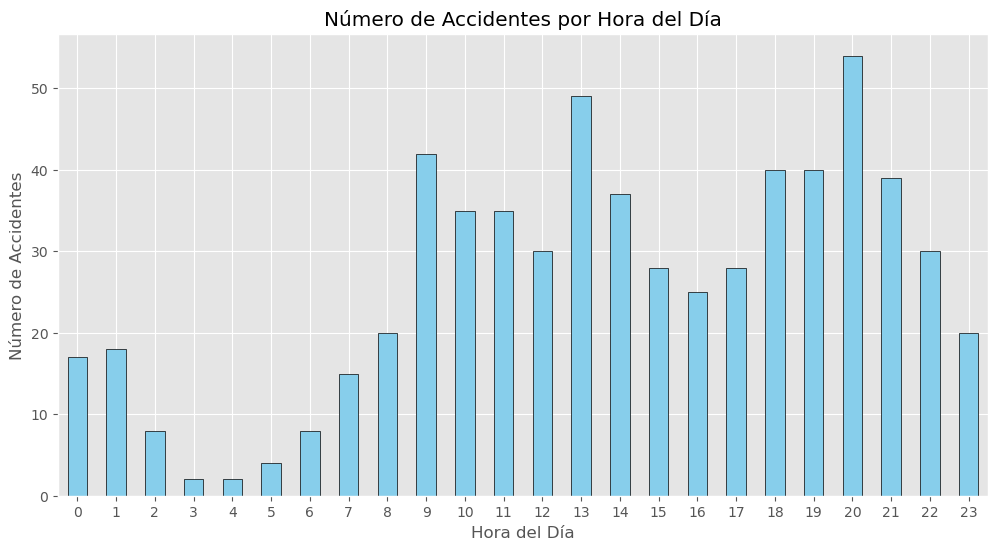

La hora con la mayor cantidad de accidentes es: 20 horas.
La hora más tranquila es: 3 horas.


In [ ]:
# Calcula el número de accidentes por cada hora
accidentes_por_hora = df['hora_int'].value_counts().sort_index()

# gráfico de barras
accidentes_por_hora.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=0)
plt.show()

#  hora con la mayor cantidad de accidentes y la más tranquila
hora_max_accidentes = accidentes_por_hora.idxmax()
hora_min_accidentes = accidentes_por_hora.idxmin()

print(f"La hora con la mayor cantidad de accidentes es: {hora_max_accidentes} horas.")
print(f"La hora más tranquila es: {hora_min_accidentes} horas.")


c. Utiliza el método groupby de Pandas para calcular el número de accidentes
por estado meteorológico. ¿A qué estado meteorológico corresponde la
mayor cantidad de accidentes?

In [ ]:
# Agrupa por estado meteorológico y cuenta el número de accidentes por tipo
accidentes_por_estado = df.groupby('estado_meteorológico').size()

# Encuentra el estado meteorológico con la mayor cantidad de accidentes
estado_max_accidentes = accidentes_por_estado.idxmax()

# Mostrar resultados
print("Número de accidentes por estado meteorológico:")
print(accidentes_por_estado)
print(f"\nEl estado meteorológico con la mayor cantidad de accidentes es: {estado_max_accidentes}")


Número de accidentes por estado meteorológico:
estado_meteorológico
Despejado         546
LLuvia intensa      3
Lluvia débil       25
Nublado            24
Se desconoce        1
dtype: int64

El estado meteorológico con la mayor cantidad de accidentes es: Despejado
